# Çok Özellikli Lineer Regresyon ile Araba Satış Fiyat Tahmini

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
import  pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from function import *
df = pd.read_csv("car_prices_numeric.csv")


categorical_features = ["Fuel Type", "Transmission", "Brand", "Model"]
numeric_features = ["Year", "Mileage", "Engine Size"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(sparse_output=False), categorical_features)
])
df_transformed = preprocessor.fit_transform(df)
df_final = pd.DataFrame(df_transformed, columns=preprocessor.get_feature_names_out())

# Güncellenmiş DataFrame oluştur

print(df_final.head())
print(df_final.columns.tolist())


   num__Year  num__Mileage  num__Engine Size  cat__Fuel Type_1  \
0   0.788595      0.383557         -0.760497               0.0   
1   0.788595     -0.634252          0.139964               0.0   
2  -0.364676      1.121934         -0.206367               0.0   
3   1.509389     -1.130483         -0.621965               1.0   
4  -1.085470     -1.659939         -1.037562               0.0   

   cat__Fuel Type_2  cat__Fuel Type_3  cat__Fuel Type_4  cat__Transmission_1  \
0               1.0               0.0               0.0                  0.0   
1               1.0               0.0               0.0                  0.0   
2               0.0               0.0               1.0                  1.0   
3               0.0               0.0               0.0                  1.0   
4               0.0               0.0               1.0                  1.0   

   cat__Transmission_2  cat__Brand_1  ...  cat__Model_11  cat__Model_12  \
0                  1.0           1.0  ...      

In [24]:
feature_columns = [col for col in df_final.columns if col != 'Price']  # Eğer 'Price' varsa

X = np.array(df_final[feature_columns])
y = np.array(df['Price'])

print(f'Özellikler: {X}, Özelliklerin Boyutu: {X.shape}')
print(f'Hedef Özellikler: {y}, Hedeflerin Boyutu: {y.shape}')

Özellikler: [[ 0.78859494  0.38355669 -0.76049701 ...  0.          0.
   0.        ]
 [ 0.78859494 -0.63425162  0.13996423 ...  0.          0.
   0.        ]
 [-0.36467572  1.12193407 -0.20636702 ...  0.          0.
   0.        ]
 ...
 [ 1.22107144 -0.1414463   0.90189298 ...  0.          0.
   0.        ]
 [ 1.22107144 -0.97686657  0.76336048 ...  0.          0.
   0.        ]
 [-0.79715221 -0.81801247  0.48629548 ...  0.          0.
   0.        ]], Özelliklerin Boyutu: (100000, 34)
Hedef Özellikler: [ 6815.98 22896.83 11398.36 ... 37395.   26578.51 10875.64], Hedeflerin Boyutu: (100000,)


In [25]:
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

print(f'Özellikler: {X}, Özelliklerin Boyutu: {X.shape}')
print(f'Hedef Özellikler: {y}, Hedeflerin Boyutu: {y.shape}')

Özellikler: [[ 1.5310565   0.60678732 -2.00386382 ... -0.26846242 -0.26846242
  -0.26846242]
 [ 1.5310565  -1.7157806   0.05092624 ... -0.26846242 -0.26846242
  -0.26846242]
 [-1.10062709  2.29171325 -0.73937763 ... -0.26846242 -0.26846242
  -0.26846242]
 ...
 [ 2.51793785 -0.59123305  1.78959476 ... -0.26846242 -0.26846242
  -0.26846242]
 [ 2.51793785 -2.49760413  1.47347321 ... -0.26846242 -0.26846242
  -0.26846242]
 [-2.08750844 -2.13511011  0.84123011 ... -0.26846242 -0.26846242
  -0.26846242]], Özelliklerin Boyutu: (100000, 34)
Hedef Özellikler: [-1.0001194   0.75332226 -0.50046074 ...  2.33418989  1.15476939
 -0.55745767], Hedeflerin Boyutu: (100000,)


In [26]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.6, random_state=42)

print(f'Eğitim (Özellik) Verilerinin Boyutu: {X_train.shape}, Eğitim (Hedef) Verilinin Boyutu: {y_train.shape}')
print(f'Test (Özellik) Verilerinin Boyutu: {X_test.shape}, Test (Hedef) Verilinin Boyutu: {y_test.shape}')

Eğitim (Özellik) Verilerinin Boyutu: (40000, 34), Eğitim (Hedef) Verilinin Boyutu: (40000,)
Test (Özellik) Verilerinin Boyutu: (60000, 34), Test (Hedef) Verilinin Boyutu: (60000,)


In [27]:
n = X_train.shape[1]
w = np.zeros((n,))
b = 0.
alpha = 0.05
iterations = 100

w_final, b_final, hist_J = run(X_train, y_train, w, b, linearFunction, costFunction, gradientFunction, alpha, iterations)

Iteration: 0, Cost: 0.3400
Iteration: 10, Cost: 0.0883
Iteration: 20, Cost: 0.0668
Iteration: 30, Cost: 0.0614
Iteration: 40, Cost: 0.0599
Iteration: 50, Cost: 0.0596
Iteration: 60, Cost: 0.0595
Iteration: 70, Cost: 0.0594
Iteration: 80, Cost: 0.0594
Iteration: 90, Cost: 0.0594
Final Weights: [ 0.27844477 -0.17138013  0.11427514 -0.07297249 -0.07427845  0.12434063
  0.04262918 -0.02303591  0.05151872 -0.12937106  0.19944315 -0.12700168
 -0.12734325  0.19960974  0.04233701  0.0483881   0.0472199  -0.03369697
  0.04762948 -0.03389103 -0.03674108 -0.03368649 -0.03535998  0.04358381
 -0.03380532 -0.03549531 -0.03619815  0.04803063 -0.03921467 -0.03464881
 -0.03576728 -0.03464862  0.04632151  0.04925061]
Final Bias: 0.016322470859139696
Prediction: 1.3469170807582664, Target: 1.3752017737713895
Prediction: -1.1505254049462714, Target: -1.1981322564648378
Prediction: -0.3459612480501938, Target: -0.042930431758413615
Prediction: 0.6779984897415815, Target: 1.2596661077463431
Prediction: -1.0

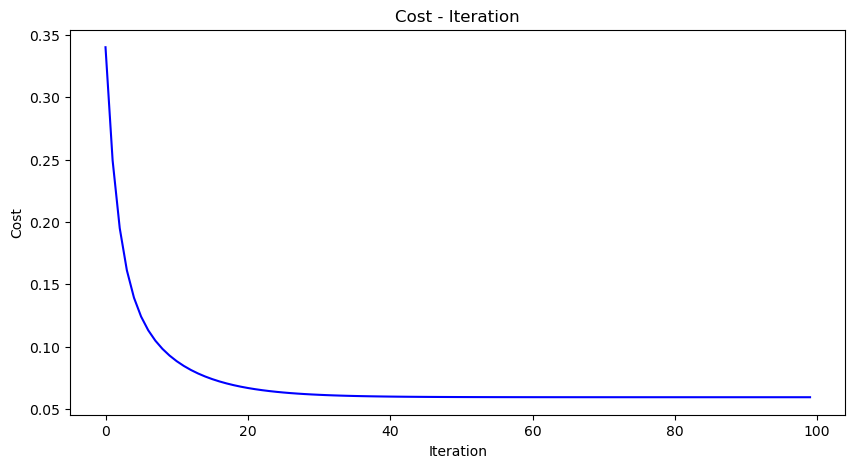

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(range(iterations), hist_J, color='blue')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost - Iteration")
plt.show()

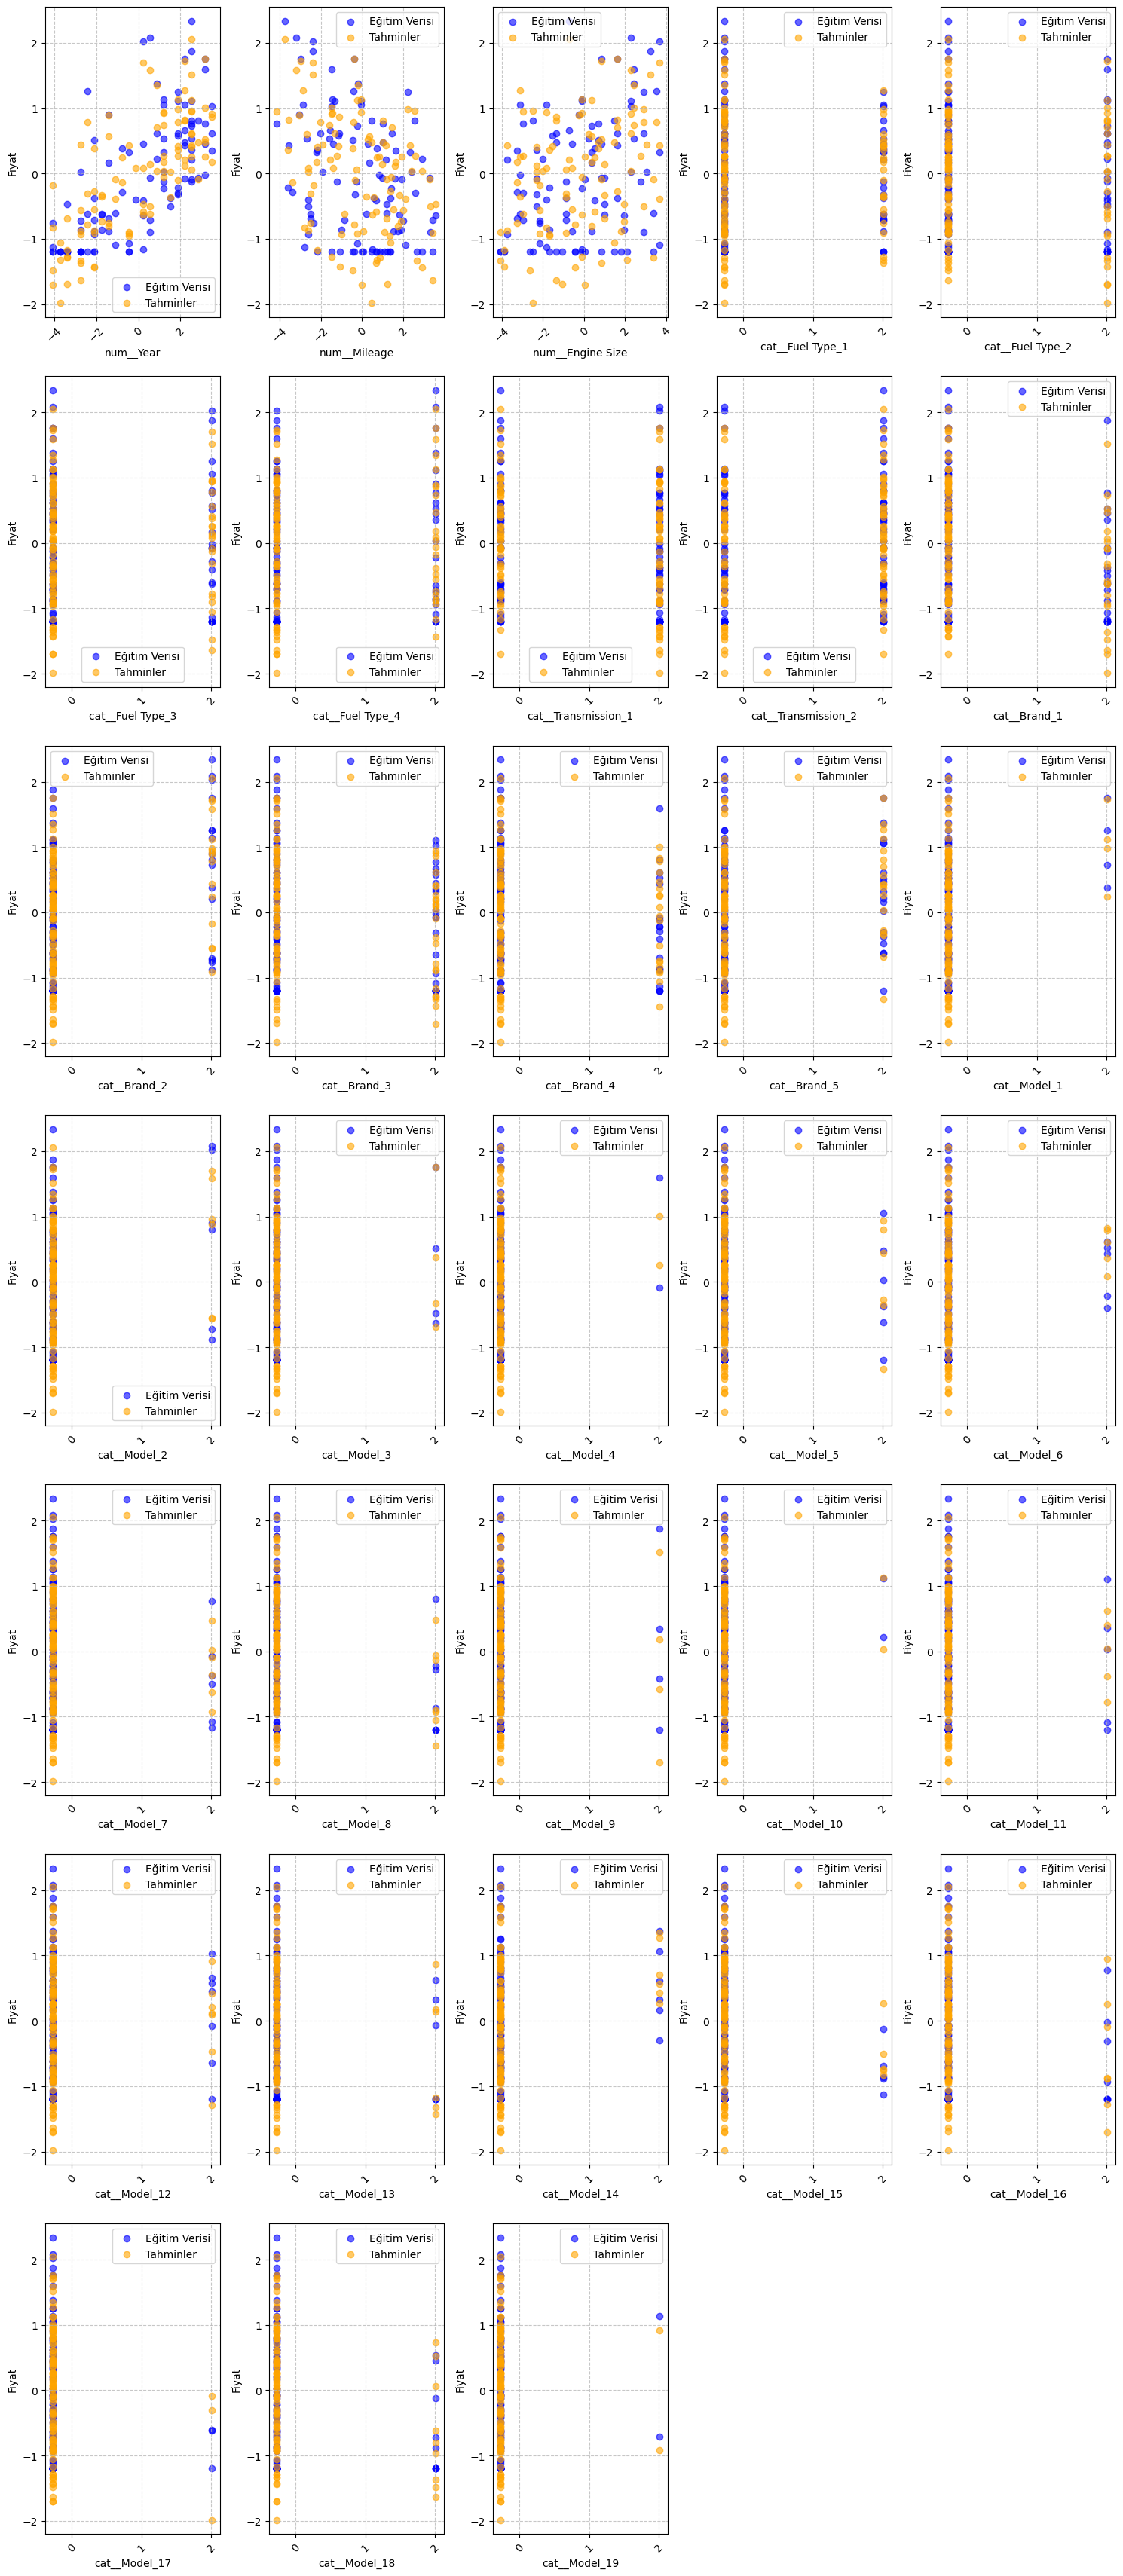

In [29]:
  # Özellik isimleri
feature_columns = df_final.columns[:-1]  # Son sütun hedef değişken olabilir, onu çıkarıyoruz
n = len(feature_columns)

# Grafik boyutlandırma - her satıra 5 grafik sığacak şekilde ayarlandı
cols = 5  # Satır başına 5 grafik
rows = (n + cols - 1) // cols  # Satır sayısını hesapla

# Eğitim ve tahmin verilerini oluştur
y_pred_train = linearFunction(X_train, w_final, b_final)

# Grafik boyutlarını ayarla
plt.figure(figsize=(15, 5 * rows))  # Yükseklik satır sayısına göre otomatik ayar

for i in range(n):
    plt.subplot(rows, cols, i + 1)  # Her bir grafiği alt alta ve yan yana koy
    plt.scatter(X_train[:100, i], y_train[:100], label="Eğitim Verisi", alpha=0.6, color="blue")
    plt.scatter(X_train[:100, i], y_pred_train[:100], label="Tahminler", alpha=0.6, color="orange")
    plt.xlabel(feature_columns[i], fontsize=10)
    plt.ylabel("Fiyat", fontsize=10)
    plt.xticks(rotation=45)
    plt.legend(loc="best")
    plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.98])  # Başlık ile grafiklerin çakışmasını önle
plt.show()

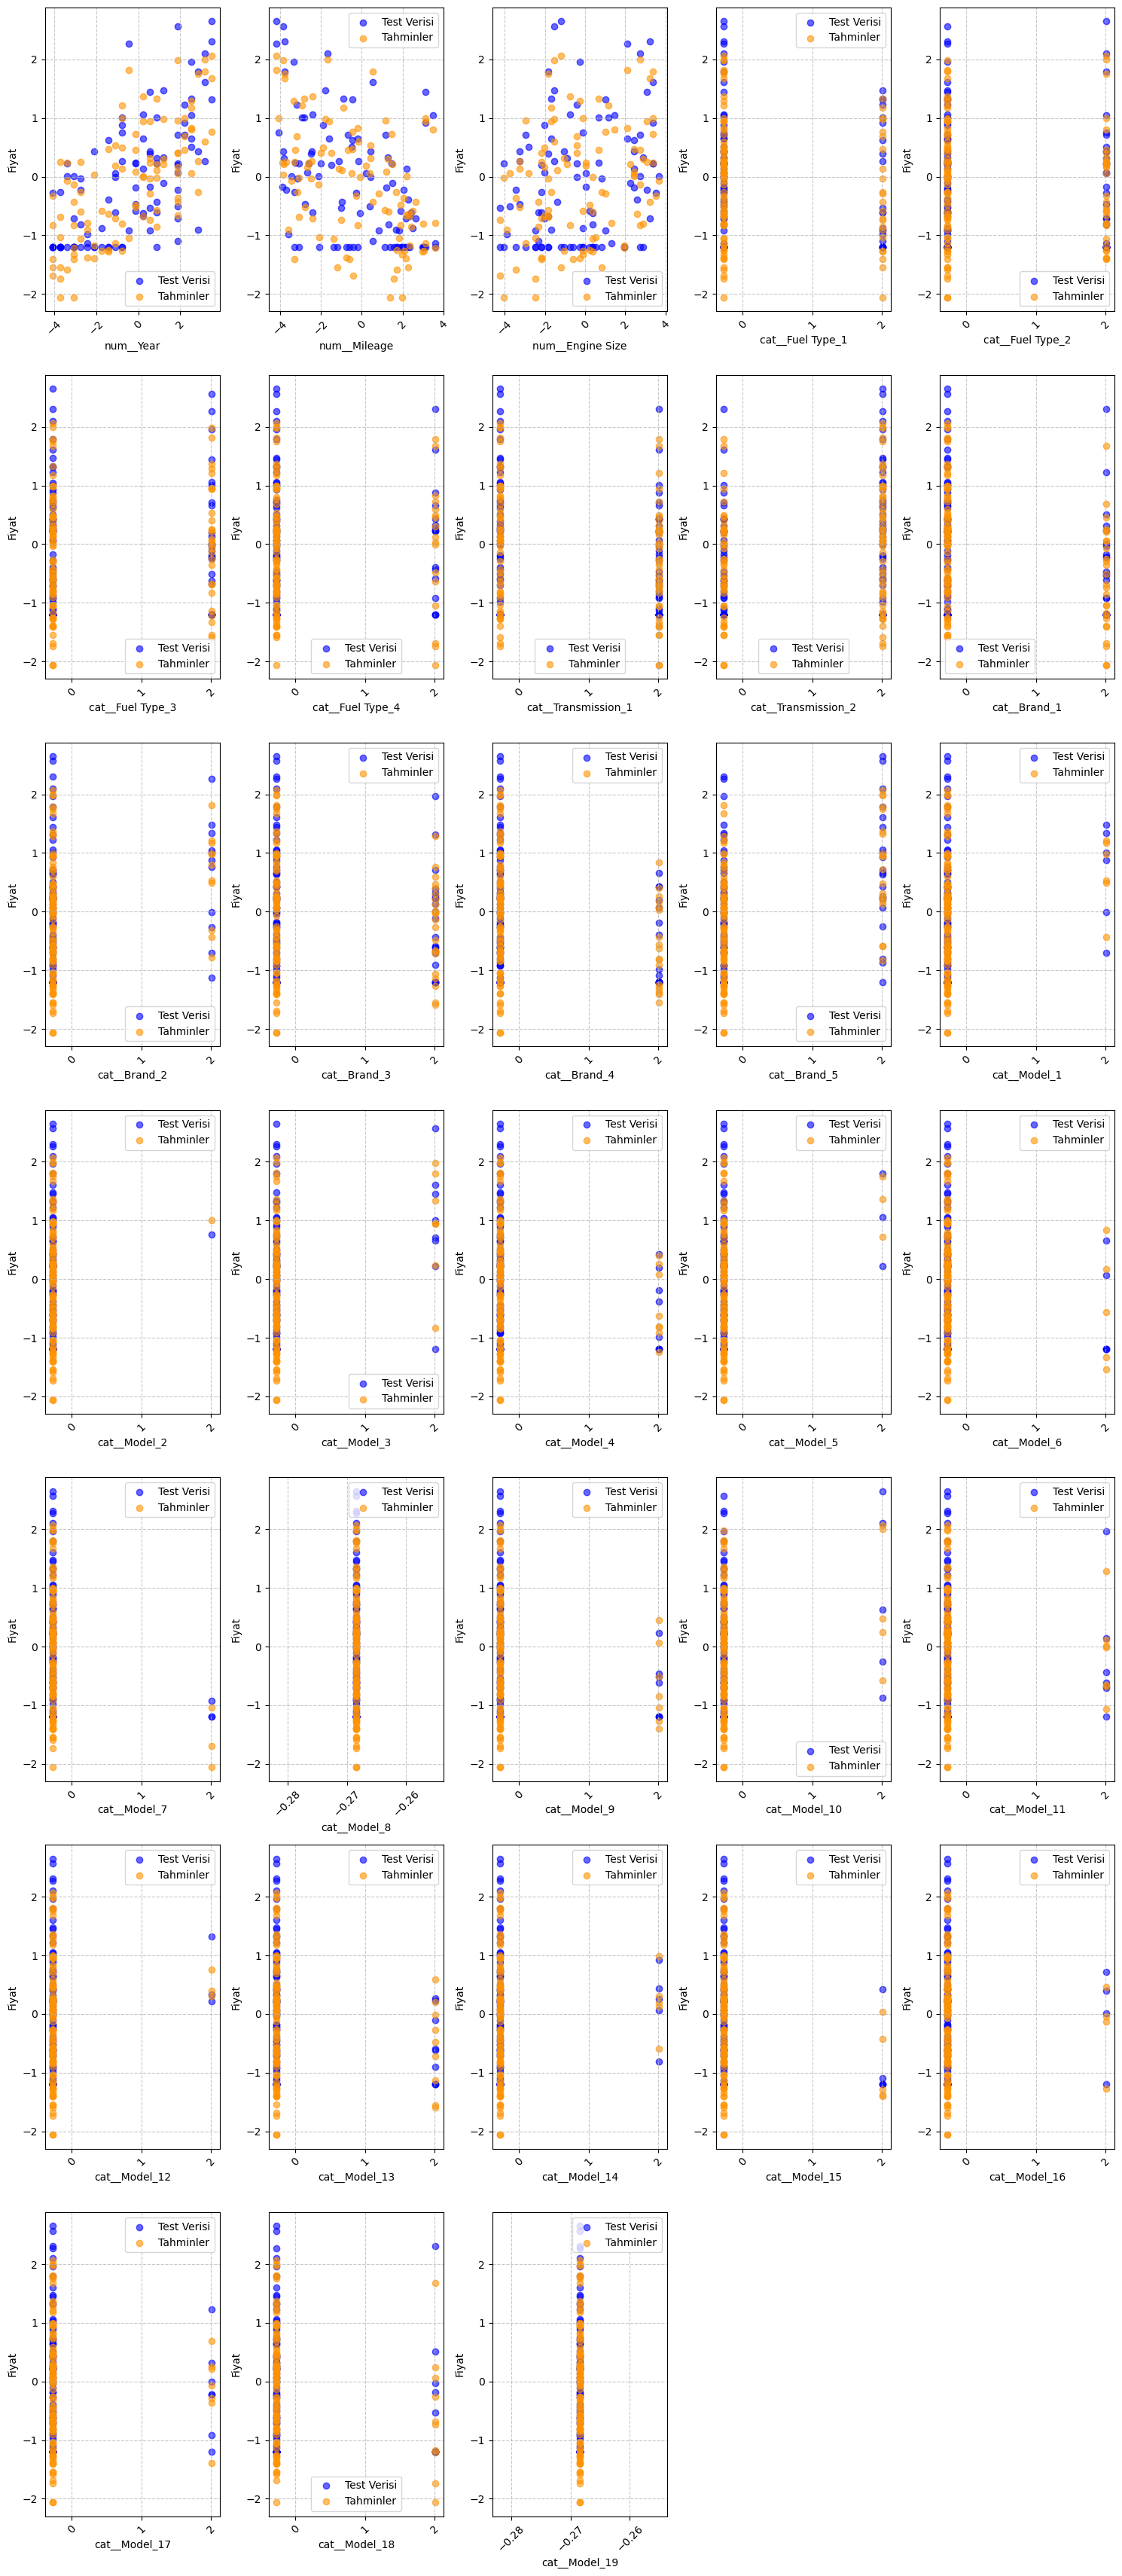

In [30]:
# Test verisi için tahminleri al
y_pred_test = linearFunction(X_test, w_final, b_final)

# Grafik boyutlarını ayarla - Test verileri için de aynı şekilde
plt.figure(figsize=(15, 5 * rows))  # Yükseklik satır sayısına göre otomatik ayar

# Test verileri ve tahminleri çiz
for i in range(n):
    plt.subplot(rows, cols, i + 1)  # Her bir grafiği alt alta ve yan yana koy
    plt.scatter(X_test[:100, i], y_test[:100], label="Test Verisi", alpha=0.6, color="blue")
    plt.scatter(X_test[:100, i], y_pred_test[:100], label="Tahminler", alpha=0.6, color="#FF9300")
    plt.xlabel(feature_columns[i], fontsize=10)
    plt.ylabel("Fiyat", fontsize=10)
    plt.xticks(rotation=45)
    plt.legend(loc="best")
    plt.grid(True, linestyle="--", alpha=0.7)

# Grafiklerin düzenini sıkıştırarak göster
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Başlık ile grafiklerin çakışmasını önle
plt.show()

In [31]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("📊 Model Başarı Oranı 📊")
print(f"🔹 Eğitim Verileri:")
print(f"   - MSE: {mse_train:.4f}")
print(f"   - RMSE: {rmse_train:.4f}")
print(f"   - R² Skoru: {r2_train:.4f}")

print(f"🔹 Test Verileri:")
print(f"   - MSE: {mse_test:.4f}")
print(f"   - RMSE: {rmse_test:.4f}")
print(f"   - R² Skoru: {r2_test:.4f}")


📊 Model Başarı Oranı 📊
🔹 Eğitim Verileri:
   - MSE: 0.1189
   - RMSE: 0.3448
   - R² Skoru: 0.8803
🔹 Test Verileri:
   - MSE: 0.1199
   - RMSE: 0.3462
   - R² Skoru: 0.8807
